<a href="https://colab.research.google.com/github/will787/theory-with-colab/blob/main/softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display
import os

In [ ]:
x1 = 2.0 / 10000
print(f"{x1:.18f}")

0.000200000000000000


In [ ]:
x2 = 1 + (1/10000) - (1 -1/10000)
print(f"{x2:.18f}")

0.000199999999999978


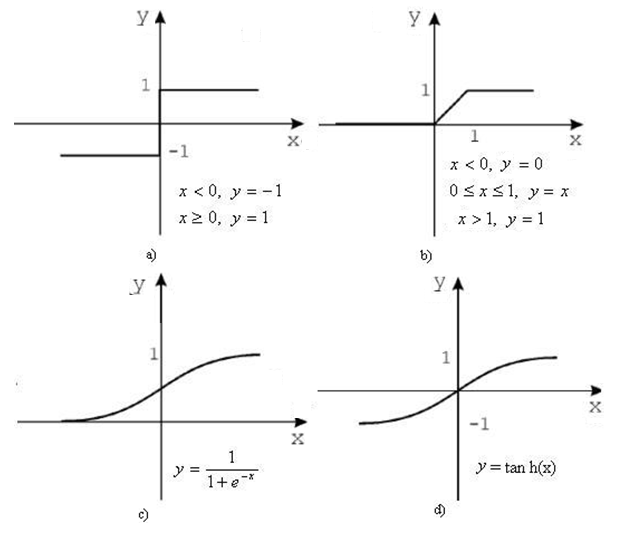

In [ ]:
#softmax regression

# (a1 ...., a10) = g(z1 ...., g10)
imagem = Image.open("/content/forlinearregression.png")
display(imagem)

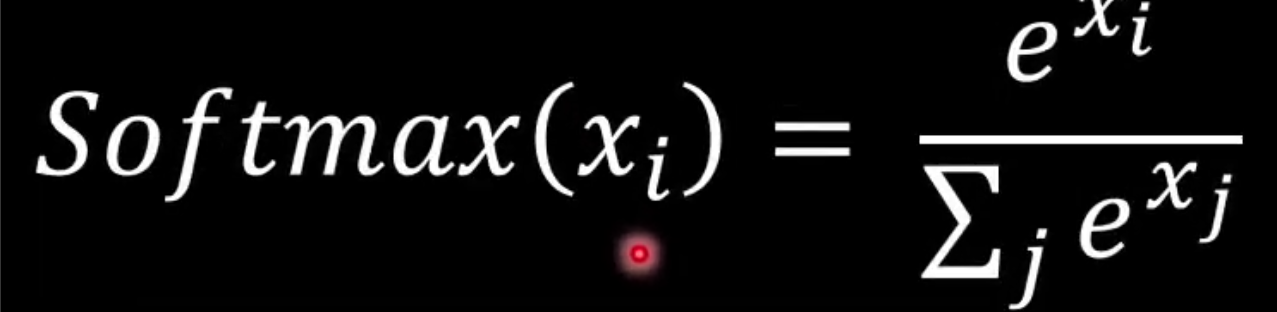

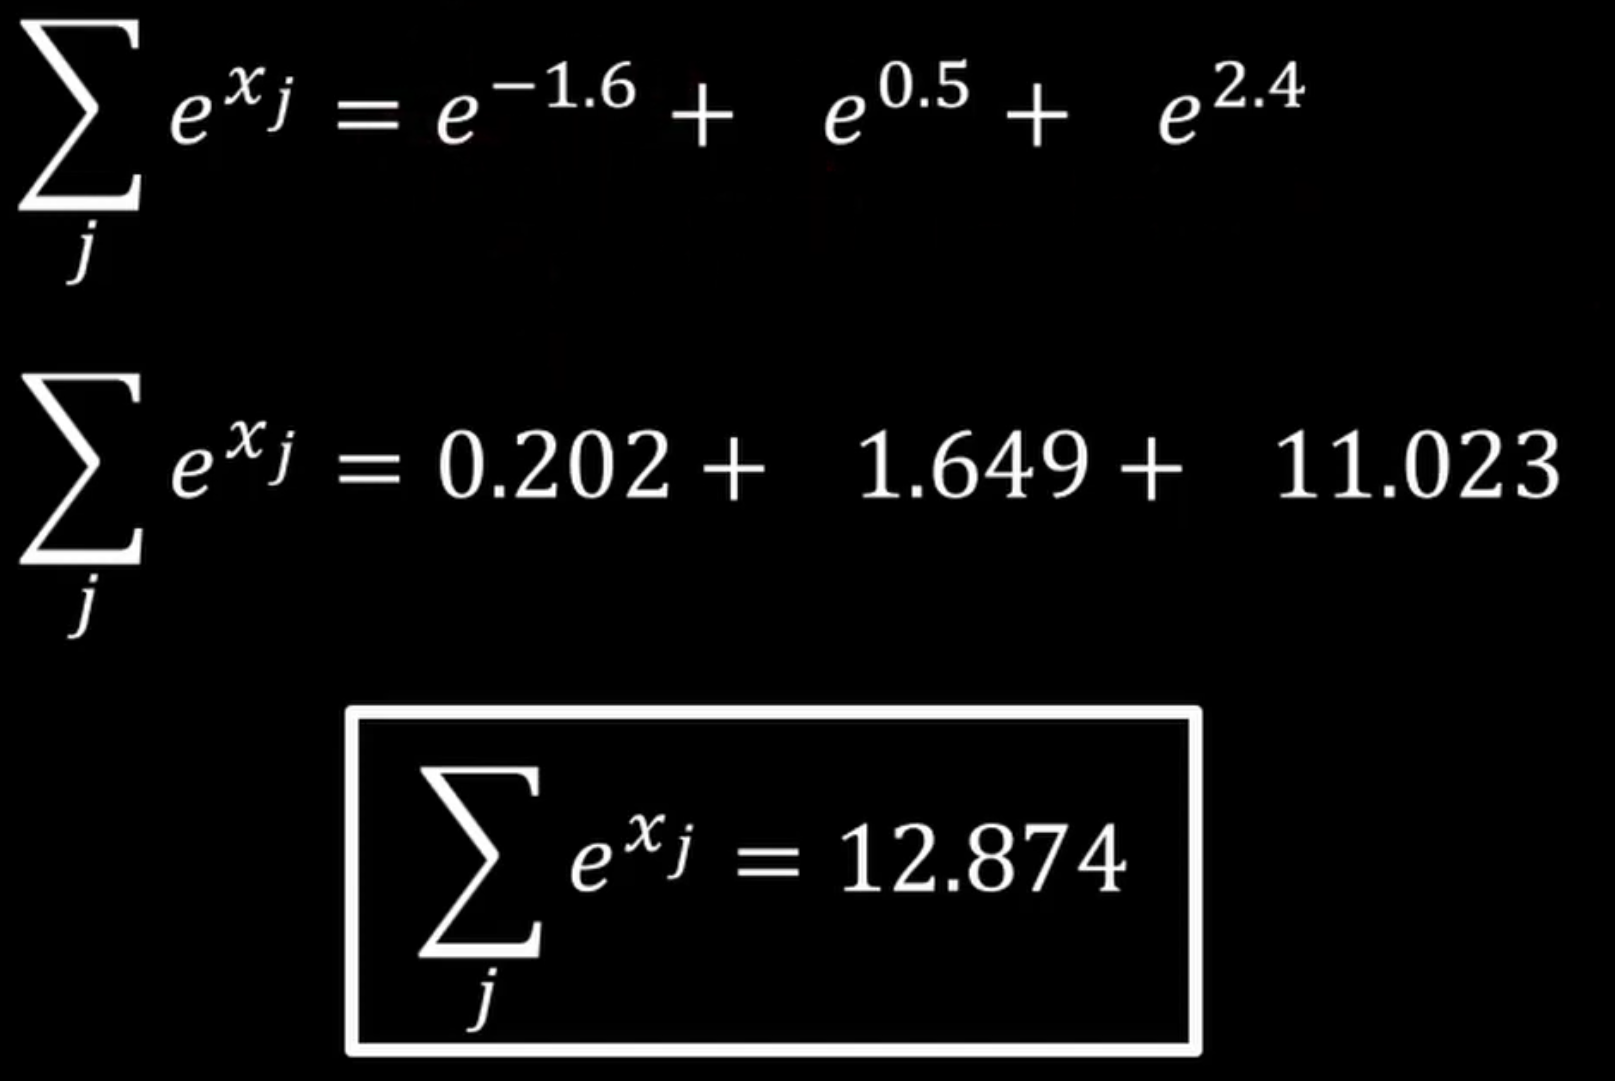

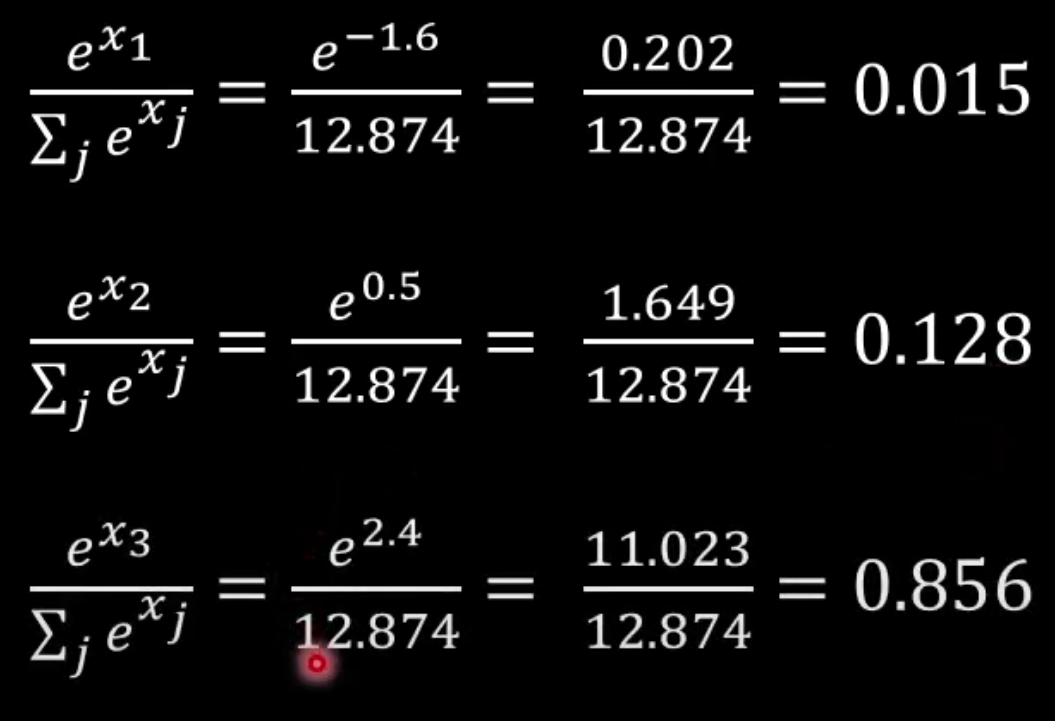

In [ ]:
images = ["/content/formula.12.05.png", "/content/step1_by_formula.29.03.png", "/content/step2_by_formula.29.40.png"]
for i in images:
  pic_i = Image.open(i)
  display(pic_i)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)


model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.2340
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.6160
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2992
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1869
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1127
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0784
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0624
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0531
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0472


In [ ]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 4ms/step
[[1.1732680e-03 2.3803718e-03 9.8064017e-01 1.5806140e-02]
 [9.9261171e-01 7.0088962e-03 4.4446773e-05 3.3484577e-04]]
largest value 0.9999998 smallest value 3.1456887e-10


In [ ]:
preferred_model = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 0.7533
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.3138
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1522
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0946
Epoch 5/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0600
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 8/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0439
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0401


In [ ]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 5ms/step
two example output vectors:
 [[-2.4202187  -1.7488925   3.0110407  -0.6436336 ]
 [ 5.8720007  -0.02874243 -4.703752   -8.203906  ]]
largest value 10.761445 smallest value -11.49222


In [ ]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[4.2140186e-03 8.2461163e-03 9.6263647e-01 2.4903331e-02]
 [9.9724394e-01 2.7298657e-03 2.5457197e-05 7.6862193e-07]]
largest value 0.9999996 smallest value 8.433389e-10


In [ ]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-2.4202187 -1.7488925  3.0110407 -0.6436336], category: 2
[ 5.8720007  -0.02874243 -4.703752   -8.203906  ], category: 0
[ 4.3758845   0.32704064 -3.5532477  -6.522411  ], category: 0
[-0.8342288  4.3130016 -1.5959798 -2.43716  ], category: 1
[-1.9277636 -3.3646421  4.066947  -3.4378443], category: 2
